In [10]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

Enter the initial prey 1 population:  200
Enter the initial prey 2 population:  100
Enter the initial predator population:  10


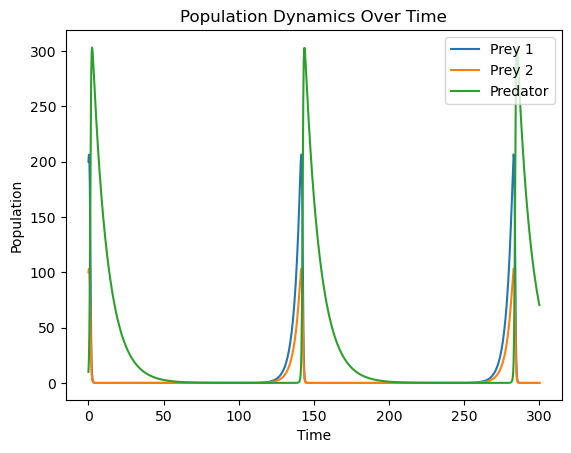

In [20]:
# Model 2a: 1 predator, 2 prey without carrying capacity

# x1 = population density for prey 1
# x2 = population density for prey 2
# y = population density for predator

# Initializing parameters
a1 = 0.25 # prey 1 growth rate
a2 = 0.25 # prey 2 growth rate
b = 0.01 # predator kill rate
c = 0.1 # predator death rate
d1 = 0.01 # predator growth rate from eating prey 1
d2 = 0.005 #predator growth rate from eating prey 2

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y = S
    return [a1*x1 - b*x1*y,
            a2*x2 - b*x2*y,
            -c*y + d1*x1*y +d2*x2*y 
           ]

# Initializing population densities
x10 = float(input("Enter the initial prey 1 population: ")) # for example: 200
x20 = float(input("Enter the initial prey 2 population: ")) # for example: 100
y0 = float(input("Enter the initial predator population: ")) # for example: 10
S0 = (x10, x20, y0)

t = np.linspace(0, 300, 1000) # time array

# Solving differential equations
sol1 = odeint(dSdt, S0, t)

sol1_x1 = sol1[:, 0] # prey 1 population over time
sol1_x2 = sol1[:, 1] # prey 2 population over time
sol1_y = sol1[:, 2] # predator population over time

# Plotting populations over time
plt.plot(t, sol1_x1, label = "Prey 1")
plt.plot(t, sol1_x2, label = "Prey 2")
plt.plot(t, sol1_y, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

Enter the initial prey 1 population:  200
Enter the initial prey 2 population:  100
Enter the initial predator population:  10


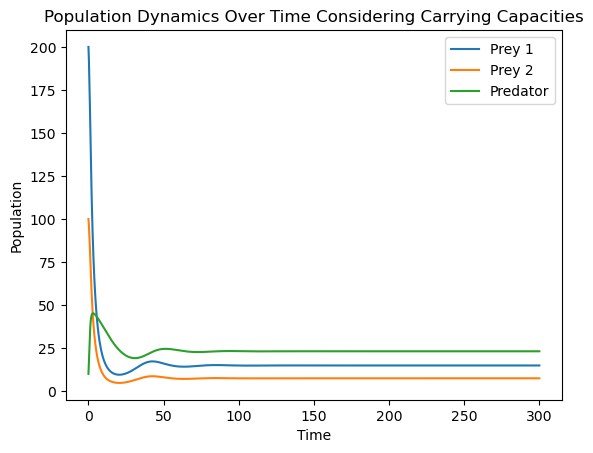

In [18]:
# Model 2b: 1 predator, 2 prey with carrying capacity

# Initializing parameters
k1 = 200 # carrying capacity of prey 1 population
k2 = 100 # carrying capacity of prey 2 population
k3 = 50 # carrying capacity of predator population

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y = S
    return [a1*x1*(1-x1/k1) - b*x1*y,
            a2*x2*(1-x2/k2) - b*x2*y,
            -c*y + d1*x1*y*(1-y/k3) + d2*x2*y*(1-y/k3) # using geometric mean of x1 and x2
           ]

# Initializing population densities
x10 = float(input("Enter the initial prey 1 population: ")) # for example: 200
x20 = float(input("Enter the initial prey 2 population: ")) # for example: 100
y0 = float(input("Enter the initial predator population: ")) # for example: 10
S0 = (x10, x20, y0)

t = np.linspace(0, 300, 1000) # time array

# Solving differential equations
sol2 = odeint(dSdt, S0, t)

sol2_x1 = sol2[:, 0] # prey 1 population over time
sol2_x2 = sol2[:, 1] # prey 2 population over time
sol2_y = sol2[:, 2] # predator population over time

# Plotting populations over time
plt.plot(t, sol2_x1, label = "Prey 1")
plt.plot(t, sol2_x2, label = "Prey 2")
plt.plot(t, sol2_y, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time Considering Carrying Capacities")
plt.show()